**Name: - Konkal Kailash Venkatesh**

**Batch:- DS2312**

**Project:- Census Income**

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data

data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 32560
No. of columns 15


### Observation

#### The most of the columns names are self explanatory remaining are explain below:

* Fnlwgt: sampling weight
* Education_num: numbers of years of education in total
* Capital_gain/Capital_loss: Income from investment sources other than salary/wages.

# Statistical Analysis

#### Before going for statistical exploration of data, first check integrity of data & missing value.

#### Data Integrity check

In [4]:
data.duplicated().sum()

24

If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?'

In [5]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#### Let's replace '?' with np.NaN

In [6]:
data = data.replace(' ?',np.NaN)

In [7]:
data.isin([' ','NA','-']).sum().any()

False

#### Observation

* We have replace '?' with np.NaN
* No whitespace, NA, '-' exist in dataset

#### Let drop duplicate entry from datasets before checking null values.

In [8]:
data.drop_duplicates(keep='last', inplace=True)

In [9]:
data.shape

(32536, 15)

# Missing value check

<Axes: >

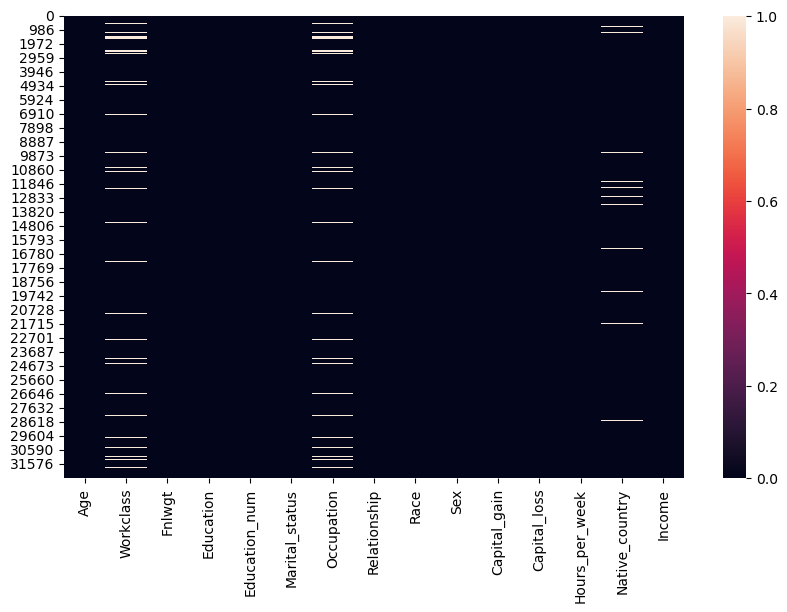

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [11]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                Missing_values  %Missing values
Occupation                1843         5.664495
Workclass                 1836         5.642980
Native_country             582         1.788788
Age                          0         0.000000
Fnlwgt                       0         0.000000
Education                    0         0.000000
Education_num                0         0.000000
Marital_status               0         0.000000
Relationship                 0         0.000000
Race                         0         0.000000
Sex                          0         0.000000
Capital_gain                 0         0.000000
Capital_loss                 0         0.000000
Hours_per_week               0         0.000000
Income                       0         0.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Observation:-

* There are 32536 rows, independent columns and 1 target variables.
* Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, hours per week are numerical variables are having int64 datatypes.
* Work class, Education, Marital_status, Occupation, Relationship, race, sex, Native country, Income are Categorial feature with object datatypes.

In [13]:
# Seprating Numerical and Categorial Variables

Numerical = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
Category= ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race','Sex', 'Native_country', 'Income']

# Missing value Imputation

In [14]:
# imputation missing values with mode for categorial features

data['Occupation'].fillna(data['Occupation'].mode()[0],inplace=True)
data['Workclass'].fillna(data['Workclass'].mode()[0],inplace=True)
data['Native_country'].fillna(data['Native_country'].mode()[0],inplace=True)

# Missing value check after imputation

In [15]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                Missing_values  %Missing values
Age                          0              0.0
Workclass                    0              0.0
Fnlwgt                       0              0.0
Education                    0              0.0
Education_num                0              0.0
Marital_status               0              0.0
Occupation                   0              0.0
Relationship                 0              0.0
Race                         0              0.0
Sex                          0              0.0
Capital_gain                 0              0.0
Capital_loss                 0              0.0
Hours_per_week               0              0.0
Native_country               0              0.0
Income                       0              0.0


#### Hence, There No missing value is present.

# Statistical Matrix

<Axes: >

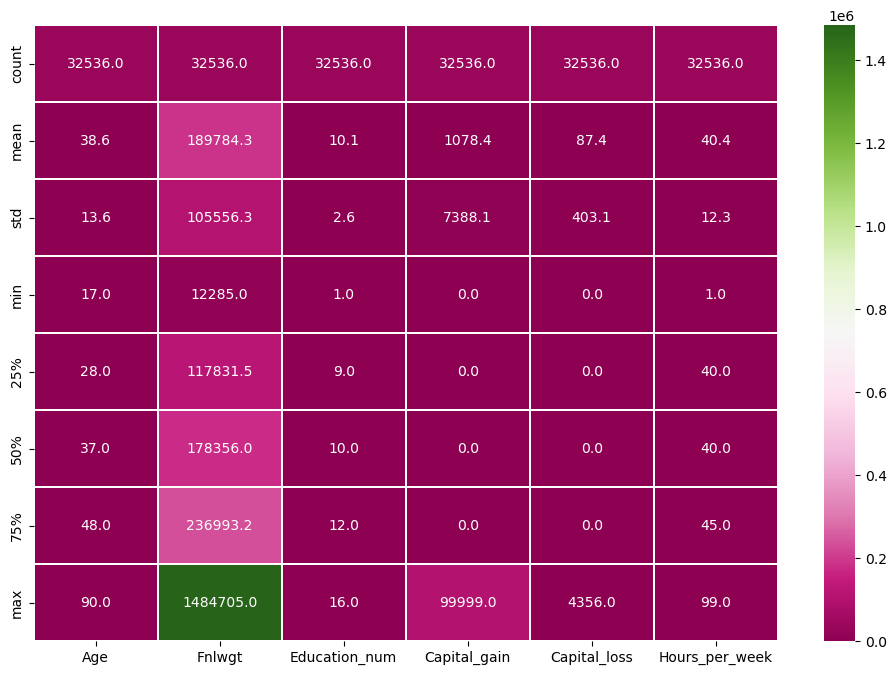

In [16]:
# visualizing the statistical of the columns using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(data.describe(),linewidths = 0.1, fmt = '0.1f',annot = True, cmap='PiYG')

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


From the above observation, we can say that

* The minimum and maximum age of people in the datasets is 19 to 90 years. While the average age is 37 years.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 9999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

# Exploring categorical features with Enlisting value counts & Sub-Categories

In [18]:
for i in Category:
    print(i)
    print(data[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# EDA

#### Start EDA by analysing our target variable first.

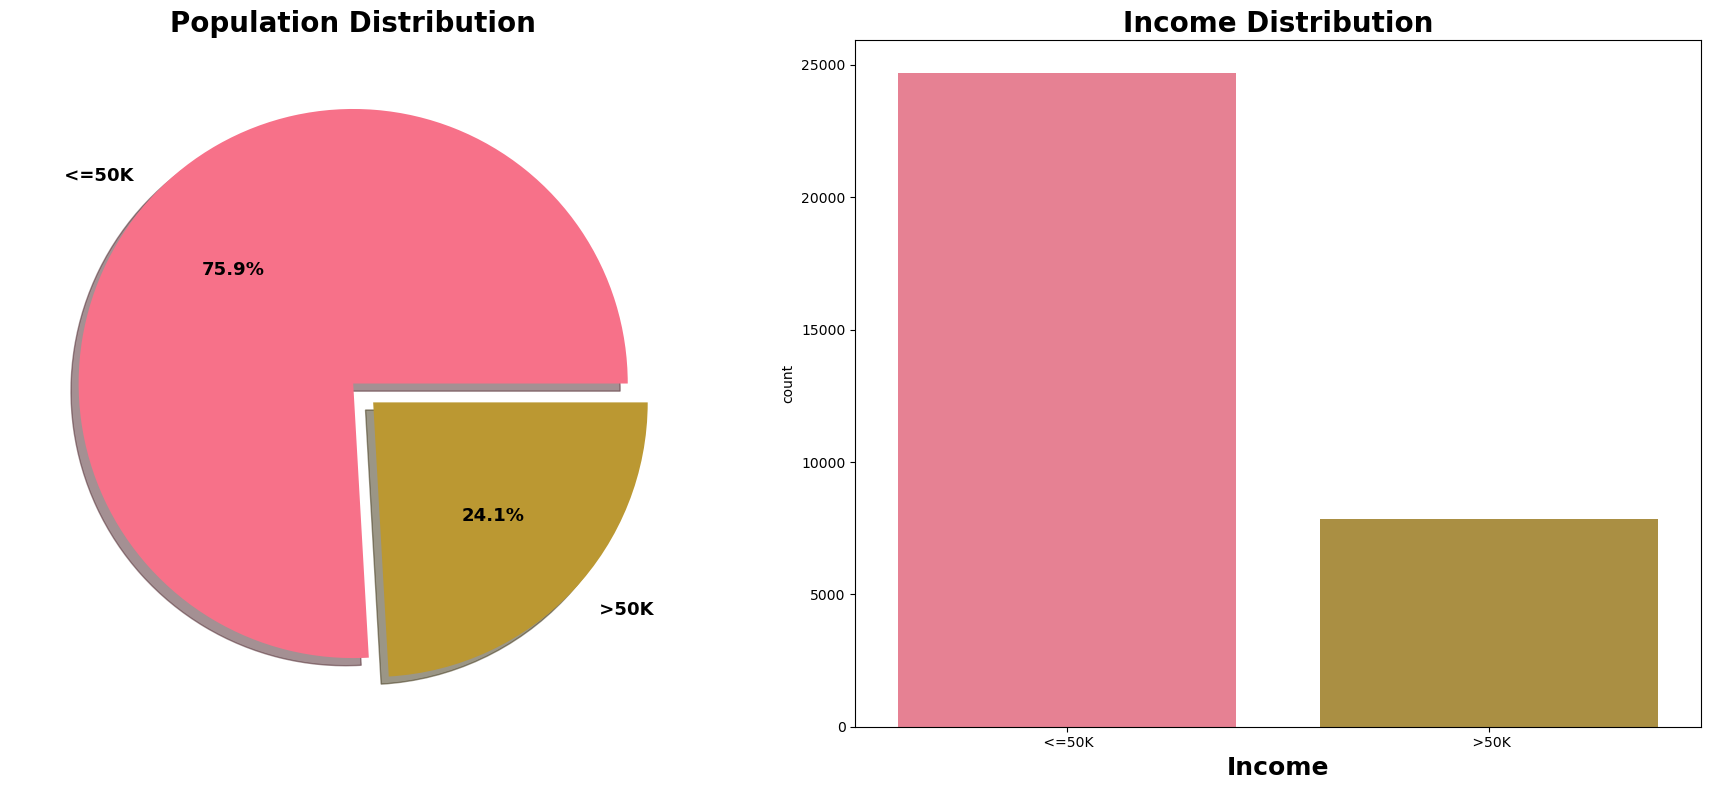

In [19]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Income', data=data, ax=ax[1])
ax[1].set_title("Income Distribution", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Income", fontsize=18, fontweight='bold')
plt.show()

From the above observation we can say that

* 75.9% population (24697) have income less than 50k.
* Our task to predict income and we can see that target variables income is imbalanced.

# Exploration of Age

In [20]:
print('Minimum Age',data['Age'].min(),'Years')
print('Maximum Age',data['Age'].max(),'Years')
print('Average Age',data['Age'].mean(),'Years')

Minimum Age 17 Years
Maximum Age 90 Years
Average Age 38.58553602163757 Years


In [21]:
# Defining function to create columns to classify people according diffrent age group

def age_group(a):
    a = int(a)
    a = abs(a)
    if (18 < a < 31):
        return "19-30"
    if (30 < a < 41):
        return "31-40"
    if (40 < a < 511):
        return "41-50"
    if (50 < a < 61):
        return "51-60"
    if (60 < a < 71):
        return "61-70"
    else:
        return "Greater Than 70"

In [22]:
# calling function age group

data['age_group']=data['Age'].apply(age_group)

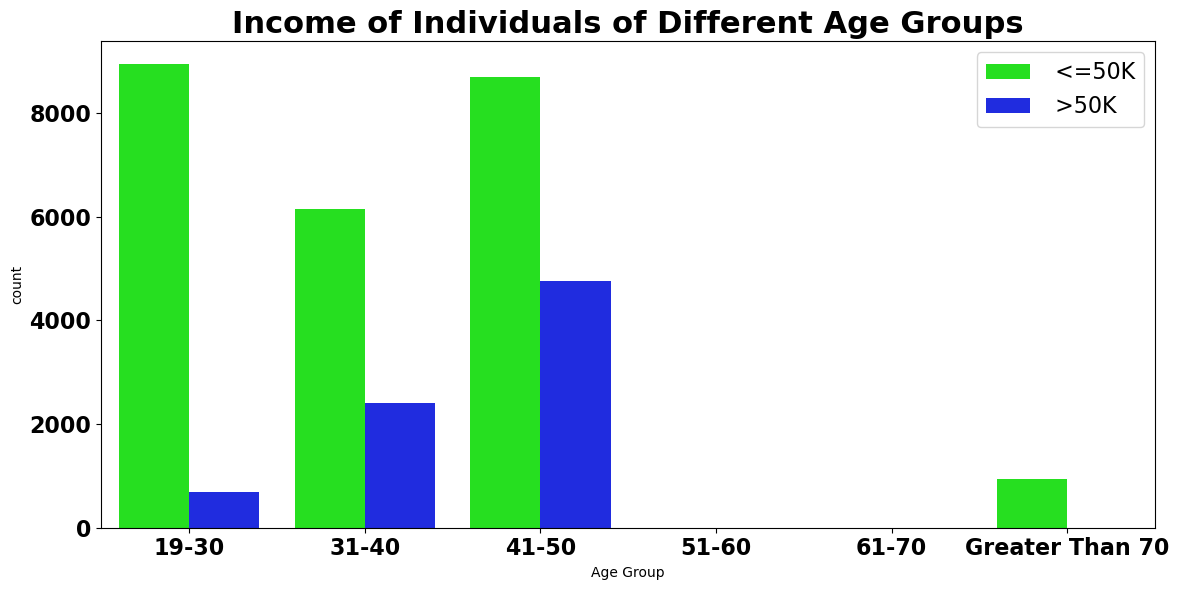

In [23]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
s = sns.countplot(x='age_group', hue = 'Income',data=data,palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Age Group')
plt.xticks(fontsize = 16, fontweight='bold')
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

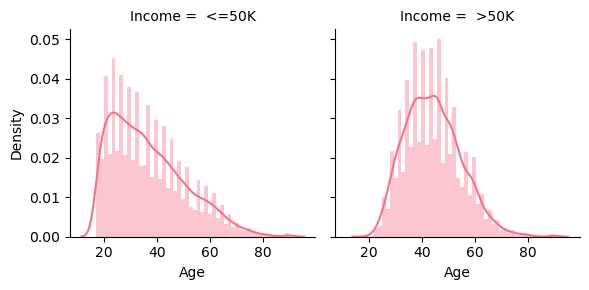

In [24]:
# Distribution of age with income categories

ax = sns.FacetGrid(data,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

From the above observation

#### Here comes an observation. we already know that only 24% people earning more than 50k dollars and this plot tell us which age group then belong.

* Almost 10% people in age group of 19-30 earn more than 50k dollars and this count drop even more in old peoples having age greater than 70, Might be some lucky old ones has created good retirement plan compare to rest old peoples.

# So let's dive into workclass and see what insights we get from there.

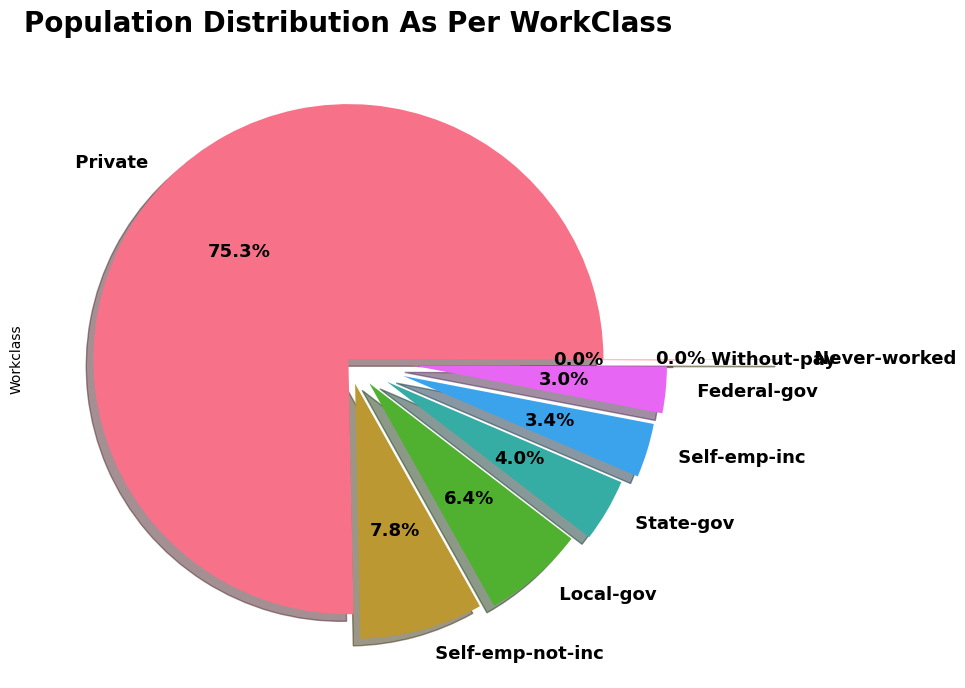

In [25]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
plt.figure(figsize=(10,10))
data['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population Distribution As Per WorkClass', fontsize =20, fontweight='bold')
plt.show()

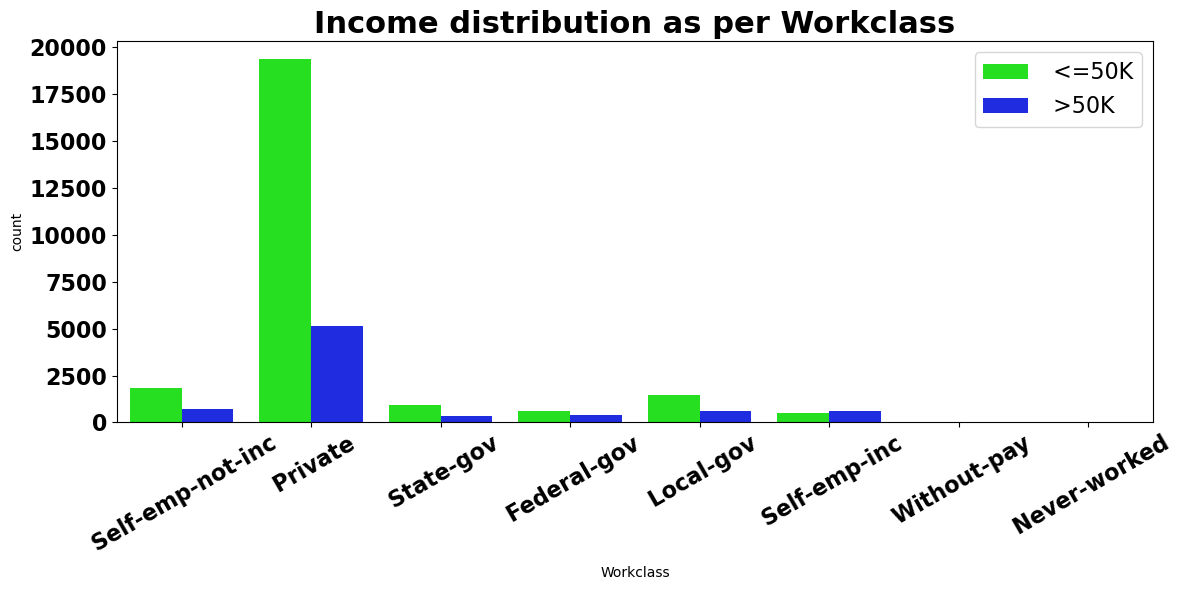

In [26]:
plt.figure(figsize=(12,6))
s = sns.countplot(x='Workclass', hue = 'Income',data=data,palette='hsv')
plt.title('Income distribution as per Workclass', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Workclass')
plt.xticks(fontsize = 16, fontweight='bold', rotation = 30)
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

In [27]:
pd.crosstab(data['Income'],data['Workclass'], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


From the above observation, we can say that

* 75.3% people belong to private sector followed by Self employeed not incorporated with 7.8%.
* Intreseting observation come with self employeed incorporated category where the number of people who earn more than 50k dollars exceeds those earning less than it.
* There is significant difference between private sector employees income where less than 25% people earn more than 50K dollars an year.
* Another quite surprising insights comes from fedral gov. countplot where we can see every minute difference between the numbers of people whose income is more or less than 50k dollars an year. Same goes with state goverment with some differences.
* yes there exits category for who never worked and working without pay but very few peoples belong to it.These peoples may be unemployeed or college students.But Number is less and Thats good.

# Education V/s Income

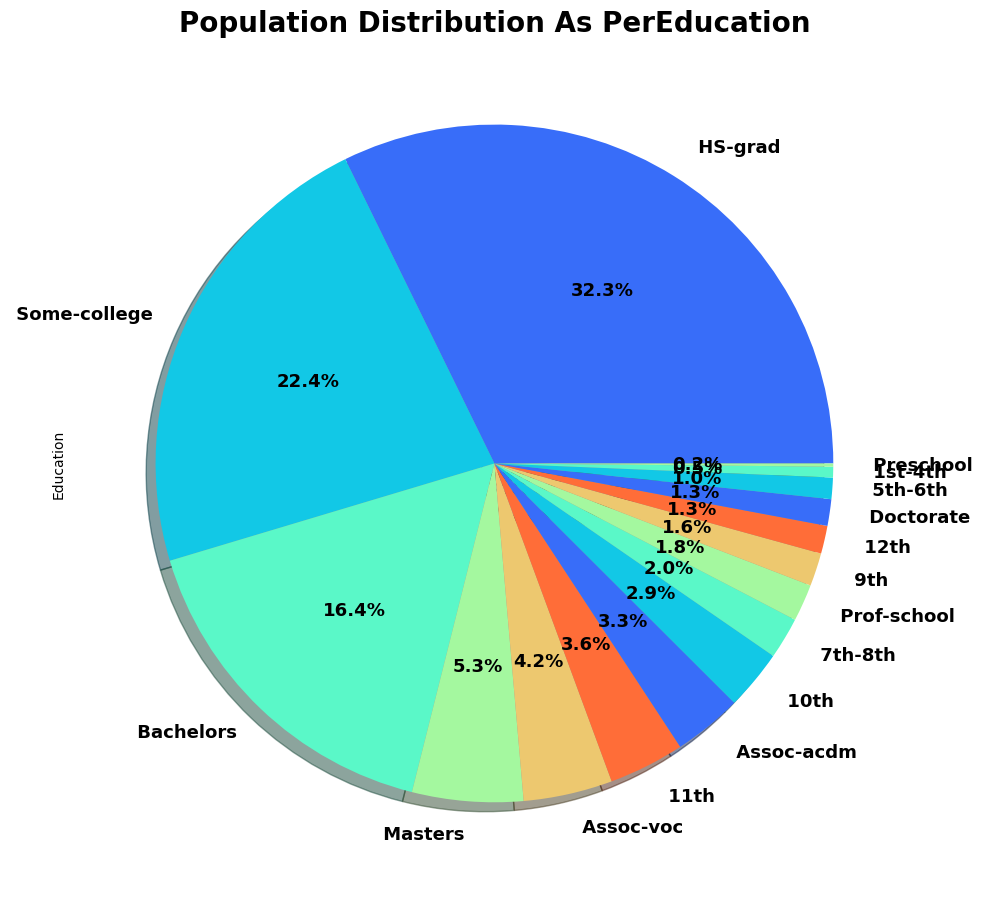

In [28]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
data['Education'].value_counts().plot.pie(autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population Distribution As PerEducation', fontsize =20, fontweight='bold')
plt.show()

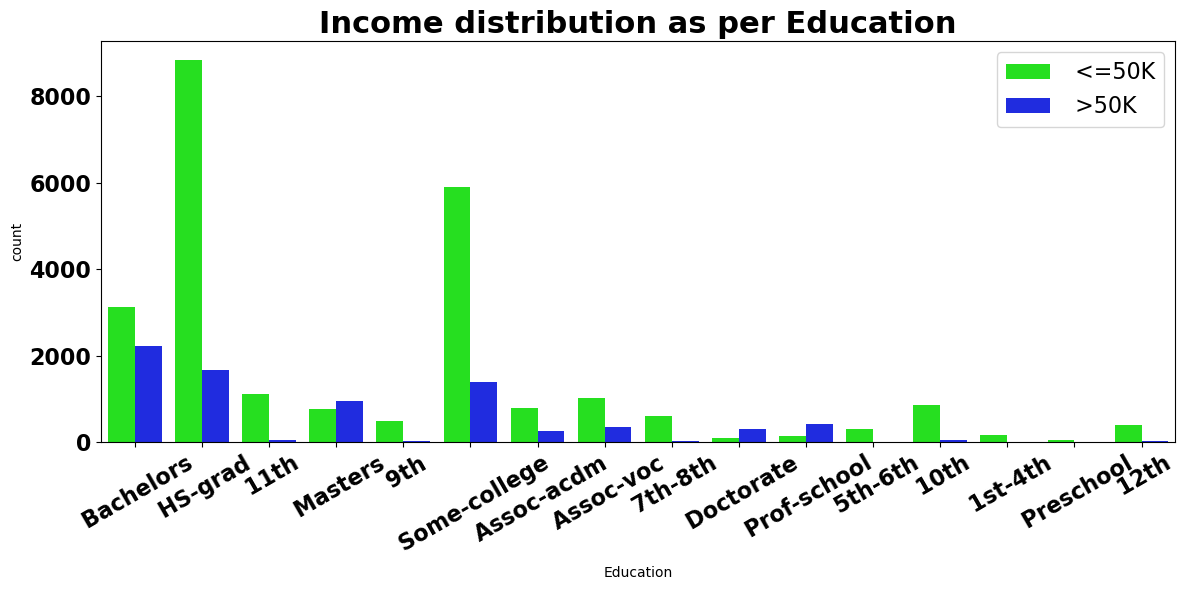

In [29]:
plt.figure(figsize=(12,6))
s = sns.countplot(x='Education', hue = 'Income',data=data,palette='hsv')
plt.title('Income distribution as per Education', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Education')
plt.xticks(fontsize = 16, fontweight='bold', rotation = 30)
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

#### From the above observation, we can say that

* Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
* 5.3% peoples were master and 1.3% peoples is Doctorate degree holder.
* There are very handful peoples who earn more than 50k dollars having educational below 12th level.
* Maximum numbers of people who earn more than 50k dollars are bachlors degree holders.
* Here Comes intresting observation about income of highly educated peoples.In case of peoples belong to Masters, Doctorate, and Prof-school category in the education level.the number people earning more than 50k dollars an year outnumber than the numbers of peoples earning less than it.
* In case of Assoc-acad or Assoc-voc, there are few peoples who earn more than 50k dollars an year!

In [30]:
pd.crosstab(data['Education'],data['Workclass'], margins=True).style.background_gradient(cmap='Blues')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


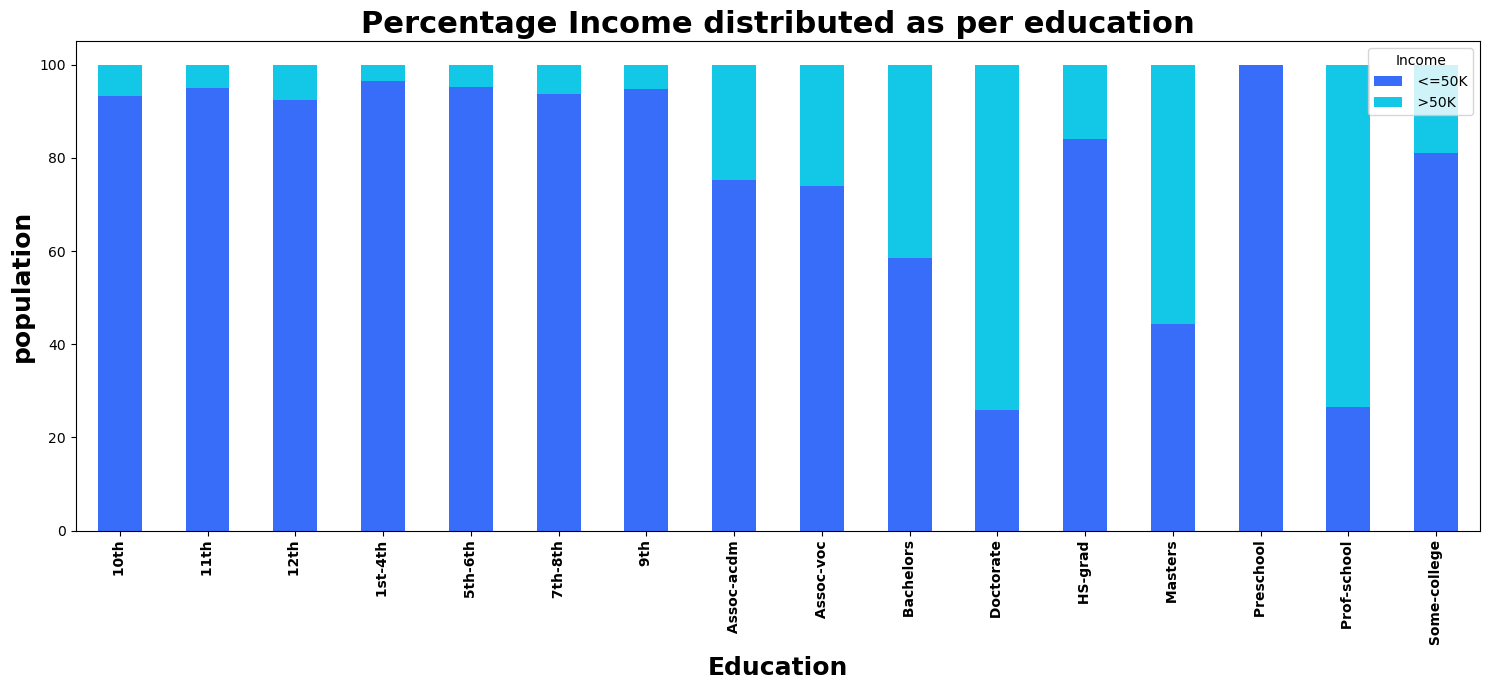

In [31]:
# percentage income disstribution in term of education

sns.set_palette('rainbow')
table = pd.crosstab(data['Education'],data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked = True, figsize=(15,7))
plt.title("Percentage Income distributed as per education",fontsize = 22,fontweight='bold')
plt.xlabel('Education',fontsize = 18, fontweight = 'bold')
plt.ylabel('population',fontsize = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

From the above observation, we can say that

* In term of percentage 75% of doctorate people earn more than 50k dollars an years, followed by prof-school.
* so, highly earning peoples most of times comes with master or doctorate education background.
* From crosstab we can see that private sector is highest recuiter for Hs-Grad with 8305 people.
* private sector is also major recuriter of highly educated people with masters, doctorable, followed by local goverment.

# Impact of Marital Status on income

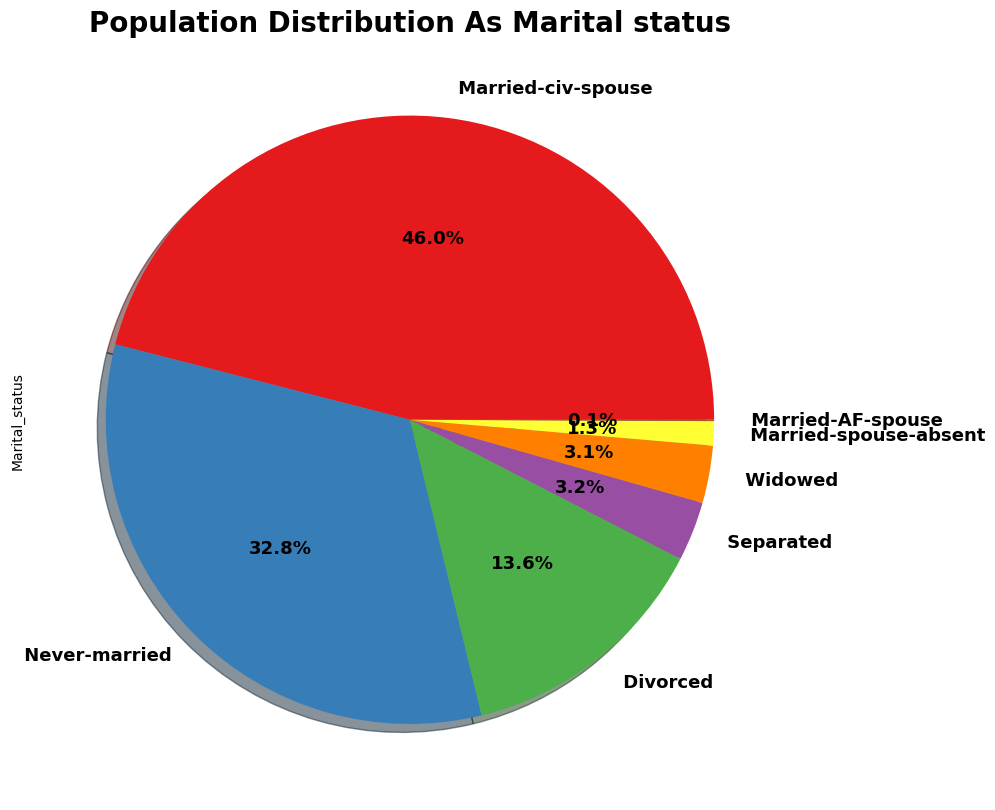

In [32]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
data['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population Distribution As Marital status', fontsize =20, fontweight='bold')
plt.show()

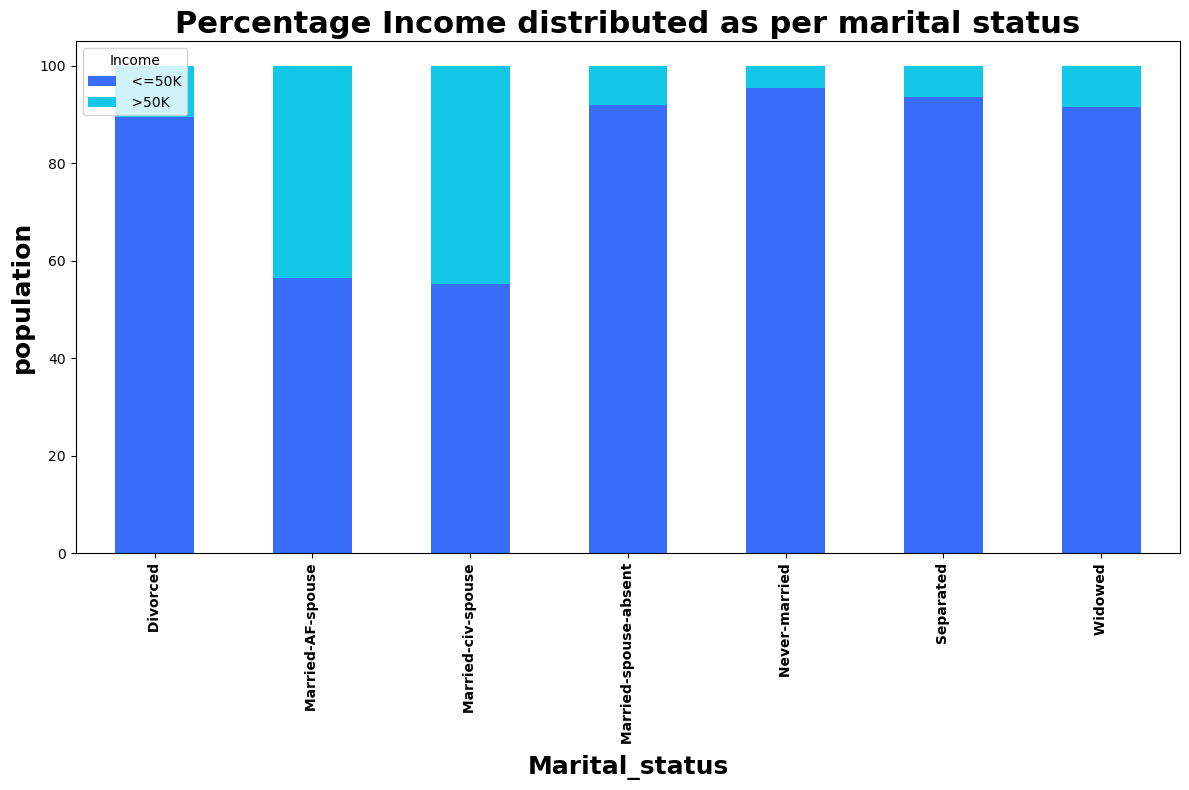

In [33]:
sns.set_palette('rainbow')
table = pd.crosstab(data['Marital_status'],data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked = True, figsize=(12,8))
plt.title("Percentage Income distributed as per marital status",fontsize = 22,fontweight='bold')
plt.xlabel('Marital_status',fontsize = 18, fontweight = 'bold')
plt.ylabel('population',fontsize = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

In [34]:
pd.crosstab(data['Marital_status'],data['Income'], margins=True).style.background_gradient(cmap='Blues')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


Married people are most like to earn more than 50k dollars an year.

# Occupation V/s Income

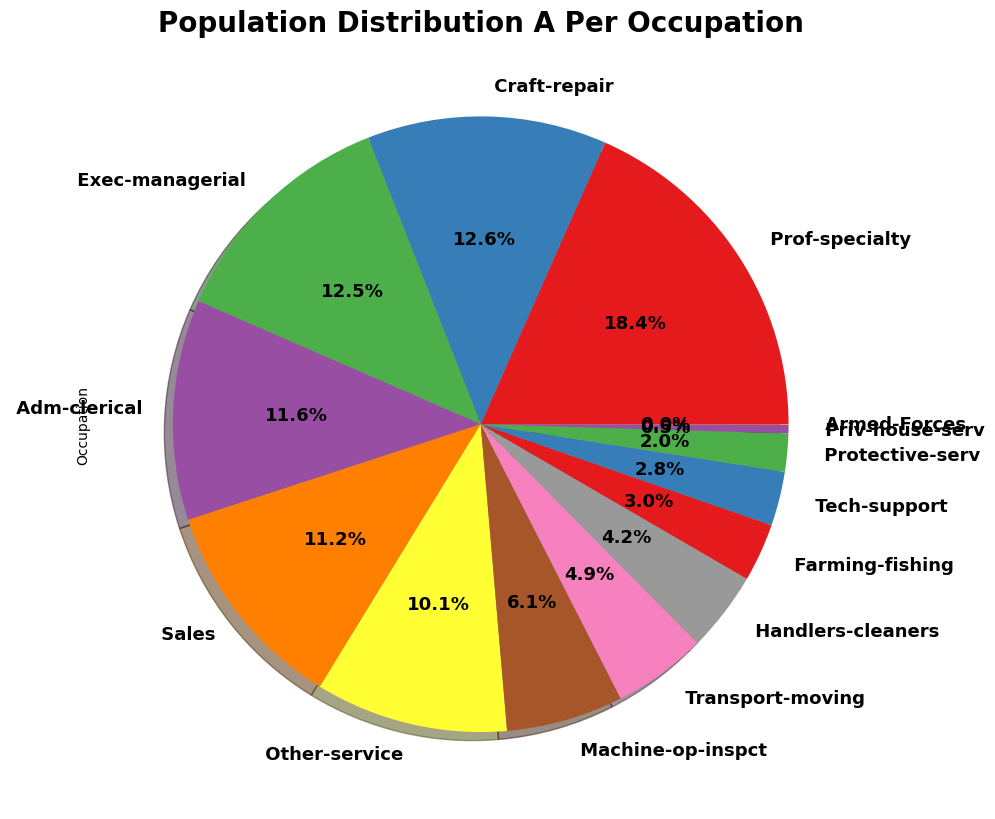

In [35]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
data['Occupation'].value_counts().plot.pie(autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population Distribution A Per Occupation', fontsize =20, fontweight='bold')
plt.show()

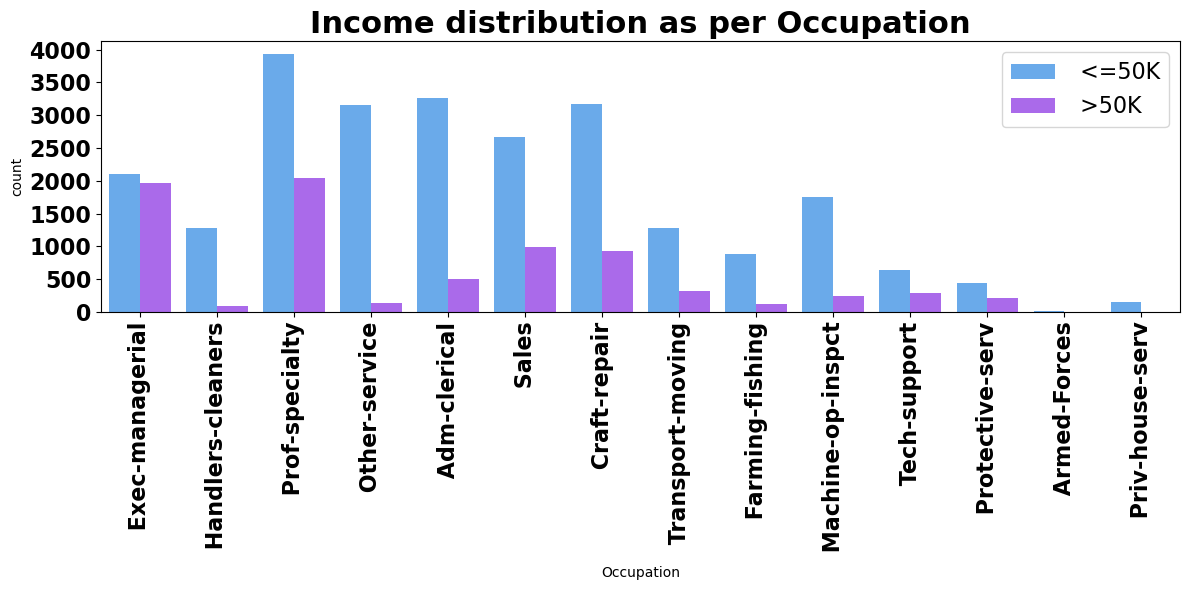

In [36]:
plt.figure(figsize=(12,6))
s = sns.countplot(x='Occupation', hue = 'Income',data=data,palette='cool')
plt.title('Income distribution as per Occupation', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Occupation')
plt.xticks(fontsize = 16, fontweight='bold', rotation = 90)
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

From the above observation, we can say that

* Exec-managerial role are equally likely to earn more than 50k dollar per year.
* Peoples working in Arm-forces, Farming-fishing, Machine-op-inspect, other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50k an year.
* Around 25% of the people working in Sales earn more than 50k dollars an year.

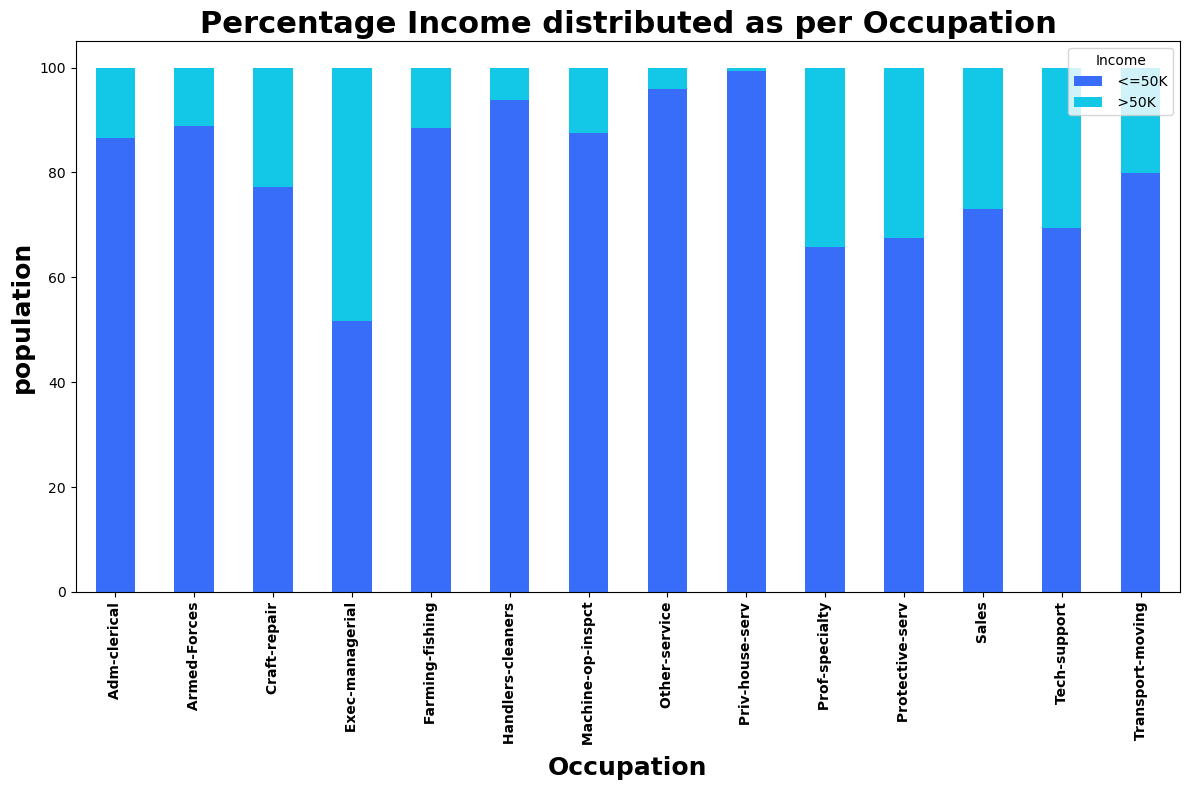

In [37]:
sns.set_palette('rainbow')
table = pd.crosstab(data['Occupation'],data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked = True, figsize=(12,8))
plt.title("Percentage Income distributed as per Occupation",fontsize = 22,fontweight='bold')
plt.xlabel('Occupation',fontsize = 18, fontweight = 'bold')
plt.ylabel('population',fontsize = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

In [38]:
pd.crosstab(data['Occupation'],data['Income'], margins=True).style.background_gradient(cmap='Blues')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


From the above observation, we can say that

* Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 peoples leads charts for greater than 50k dollars an year.
* If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in greater than 50k dollar club.

In [39]:
pd.crosstab(data['Occupation'],data['Workclass'], margins=True).style.background_gradient(cmap='Blues_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


From the above observation, we can say that

Here is another surprising element, there are 7 peoples from Never Worked category with High earning profession of prof-speciality.Same from without pay workclass we find 6 peoples with Exec-Managerial.Possibly they are working with unpaid internship profile.

# Relationship V/s Income

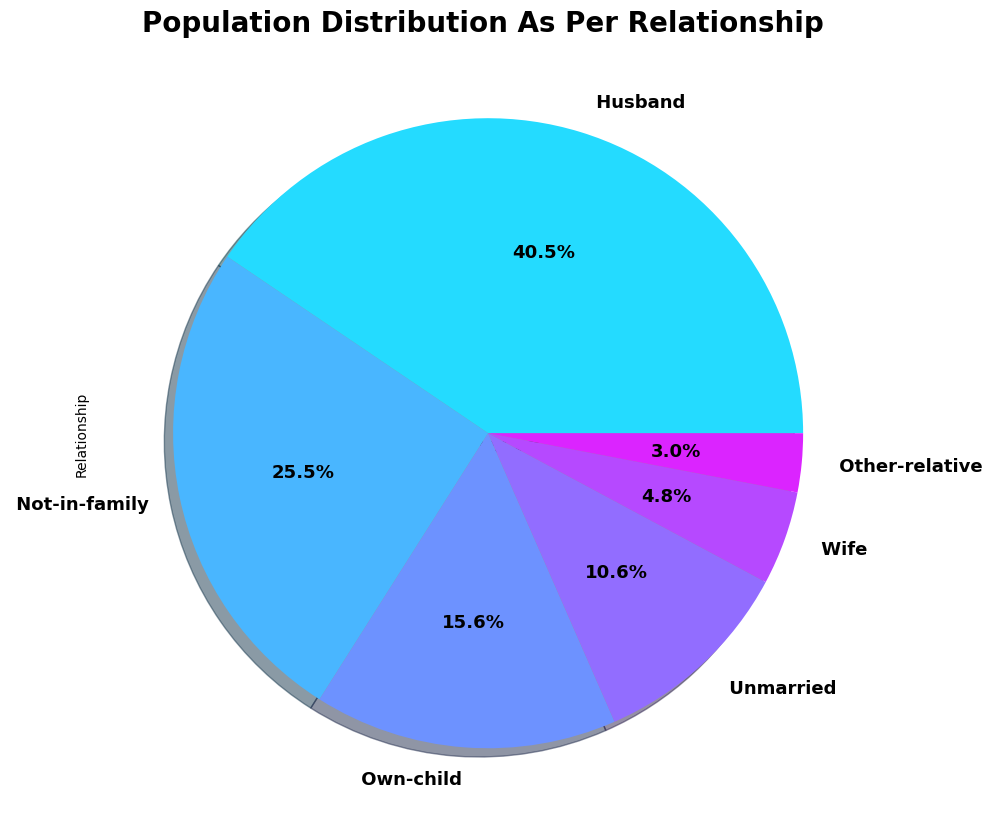

In [40]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('cool')
plt.figure(figsize=(10,10))
data['Relationship'].value_counts().plot.pie(autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population Distribution As Per Relationship ', fontsize =20, fontweight='bold')
plt.show()

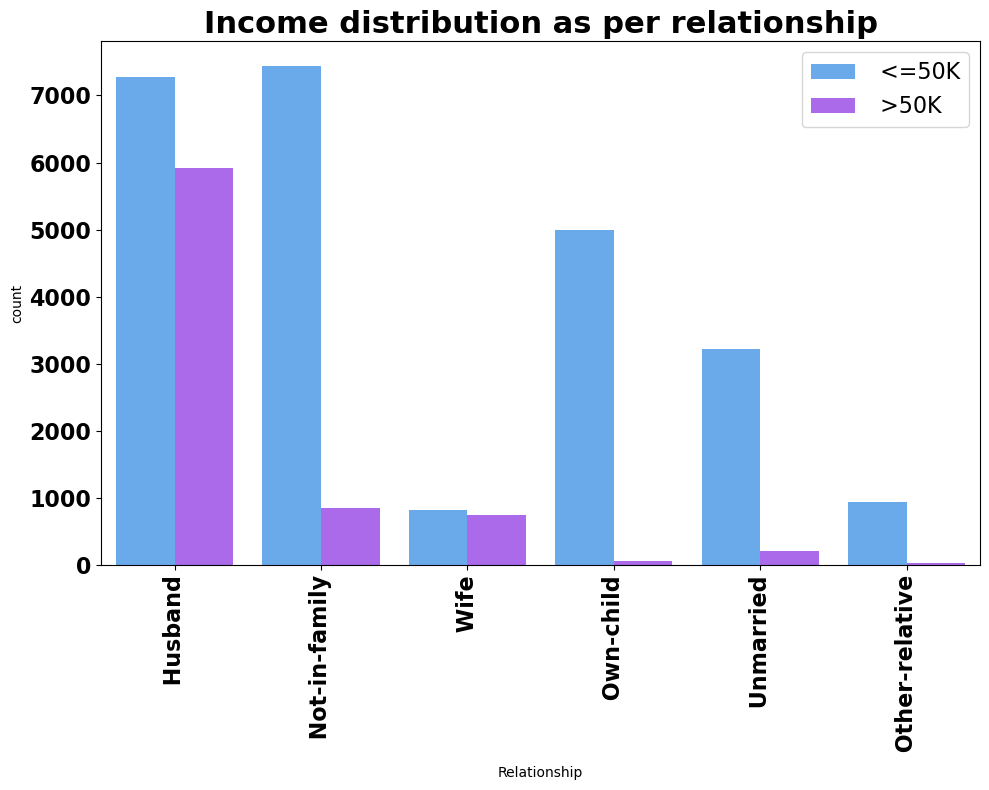

In [41]:
plt.figure(figsize=(10,8))
s = sns.countplot(x='Relationship', hue = 'Income',data=data,palette='cool')
plt.title('Income distribution as per relationship', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Relationship')
plt.xticks(fontsize = 16, fontweight='bold', rotation = 90)
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

From the above observation, we can say that

* Wives are equally likely to earn more than 50k dollars an year.
* For husband, althought significant, there is less possibility of them to earn money more than 50k dollars an year.
* There are just a handful of Unmarried peoples earnng more than 50k dollars an year.

# Race V/s Income

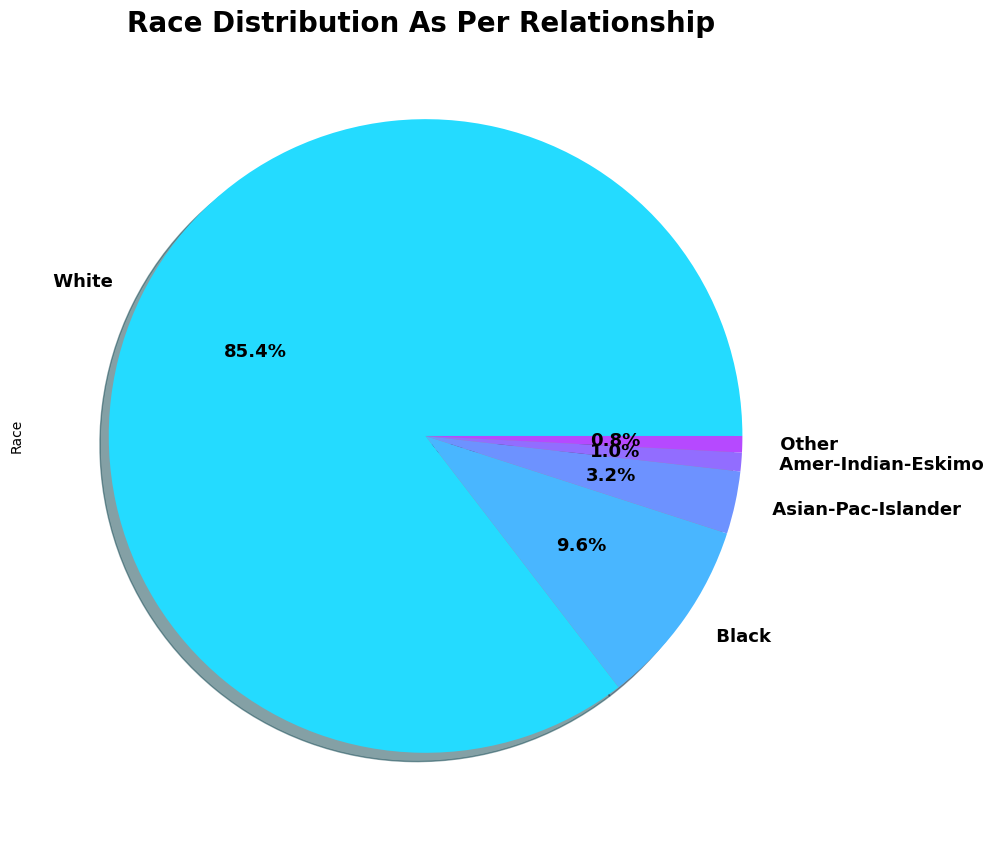

In [42]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('cool')
plt.figure(figsize=(10,10))
data['Race'].value_counts().plot.pie(autopct='%2.1f%%'
                                       ,textprops = {'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Race Distribution As Per Relationship ', fontsize =20, fontweight='bold')
plt.show()

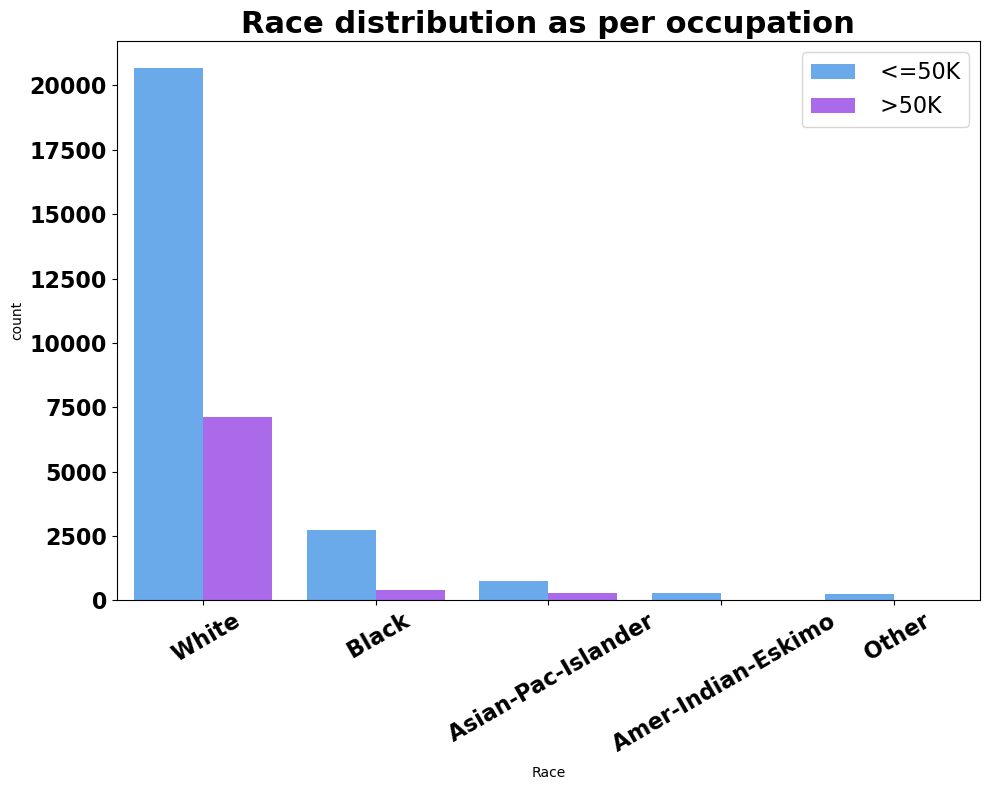

In [43]:
plt.figure(figsize=(10,8))
s = sns.countplot(x='Race', hue = 'Income',data=data,palette='cool')
plt.title('Race distribution as per occupation', fontsize = 22, fontweight = 'bold')
s.set_xlabel('Race')
plt.xticks(fontsize = 16, fontweight='bold', rotation = 30)
plt.yticks(fontsize = 16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

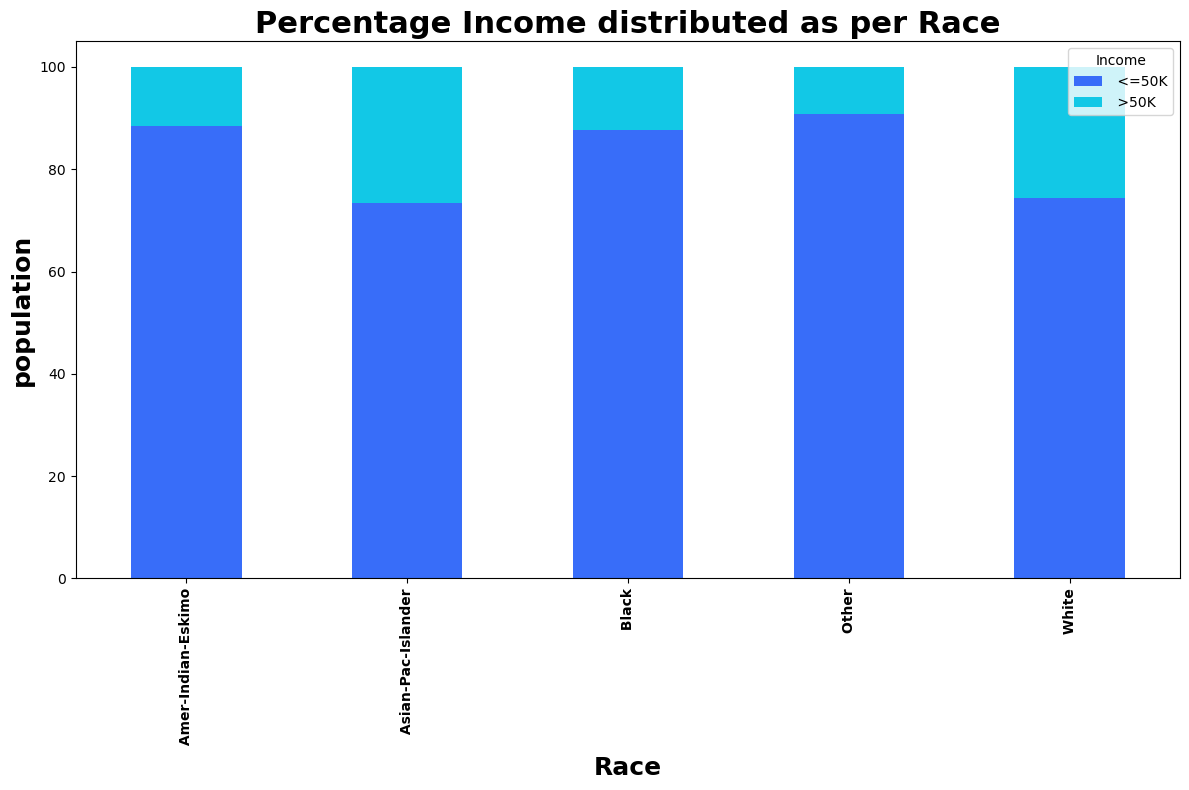

In [44]:
sns.set_palette('rainbow')
table = pd.crosstab(data['Race'],data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked = True, figsize=(12,8))
plt.title("Percentage Income distributed as per Race",fontsize = 22,fontweight='bold')
plt.xlabel('Race',fontsize = 18, fontweight = 'bold')
plt.ylabel('population',fontsize = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

From the above observation, we can say that

* 85.4 peoples are whites followed by black community with 9.6%.
* Maximum peoples in Greather than 50k club are white. This Observation is biased as we have very less data of other races. So Nothing Meaningful & Reliable insights we can draw from it.

# Sex V/s Income

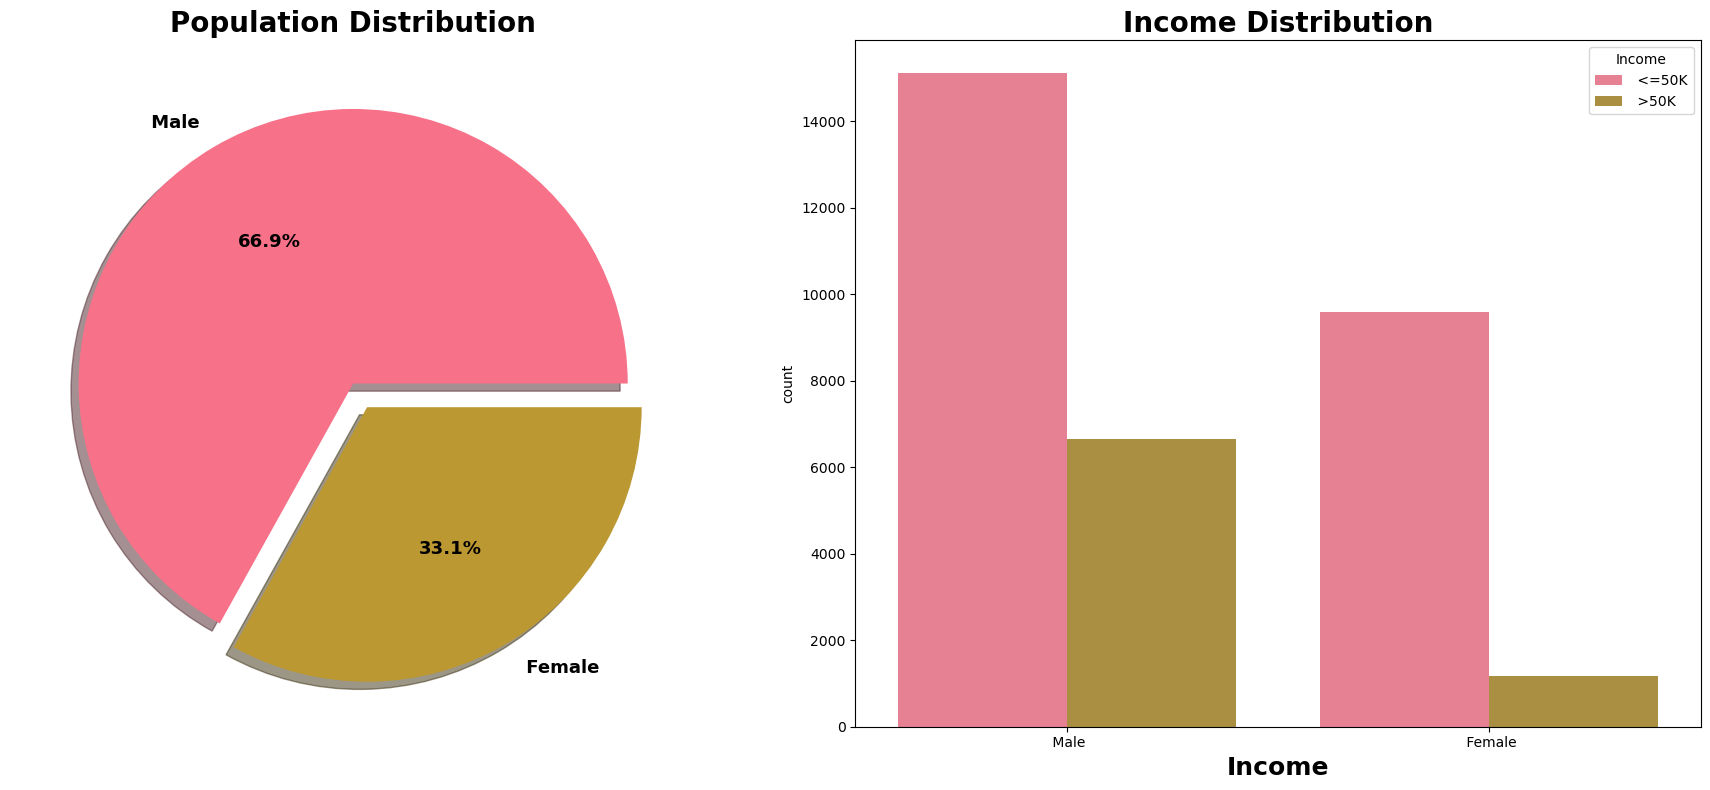

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',textprops={'fontweight': 'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Population Distribution',fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Sex',hue='Income' ,data=data,ax=ax[1])
ax[1].set_title('Income Distribution', fontsize=20,fontweight='bold')
ax[1].set_xlabel("Income", fontsize=18, fontweight='bold')
plt.show()

From the above observation, we can say that

* Significant gap between male and female earnings.
* Less than 10% women in Greater than 50k Dollar Club.
* Around 33% of men earnings more than 50k dollars an year.

In [46]:
pd.crosstab(data['Occupation'],[data.Sex,data.Income], margins=True).style.background_gradient(cmap='Set3_r')

From the above observation, we can say that

* Out of all population 33% are womens. Inside that most of females work in Adm-clerical, Other-service,Prof-specialty.
* Same in case of men maximum numbers in greater than 50k dollars club in females comes from Prof-specialty,Exec-Manegrial profession.
* Maximum men work in Prof-specialty.

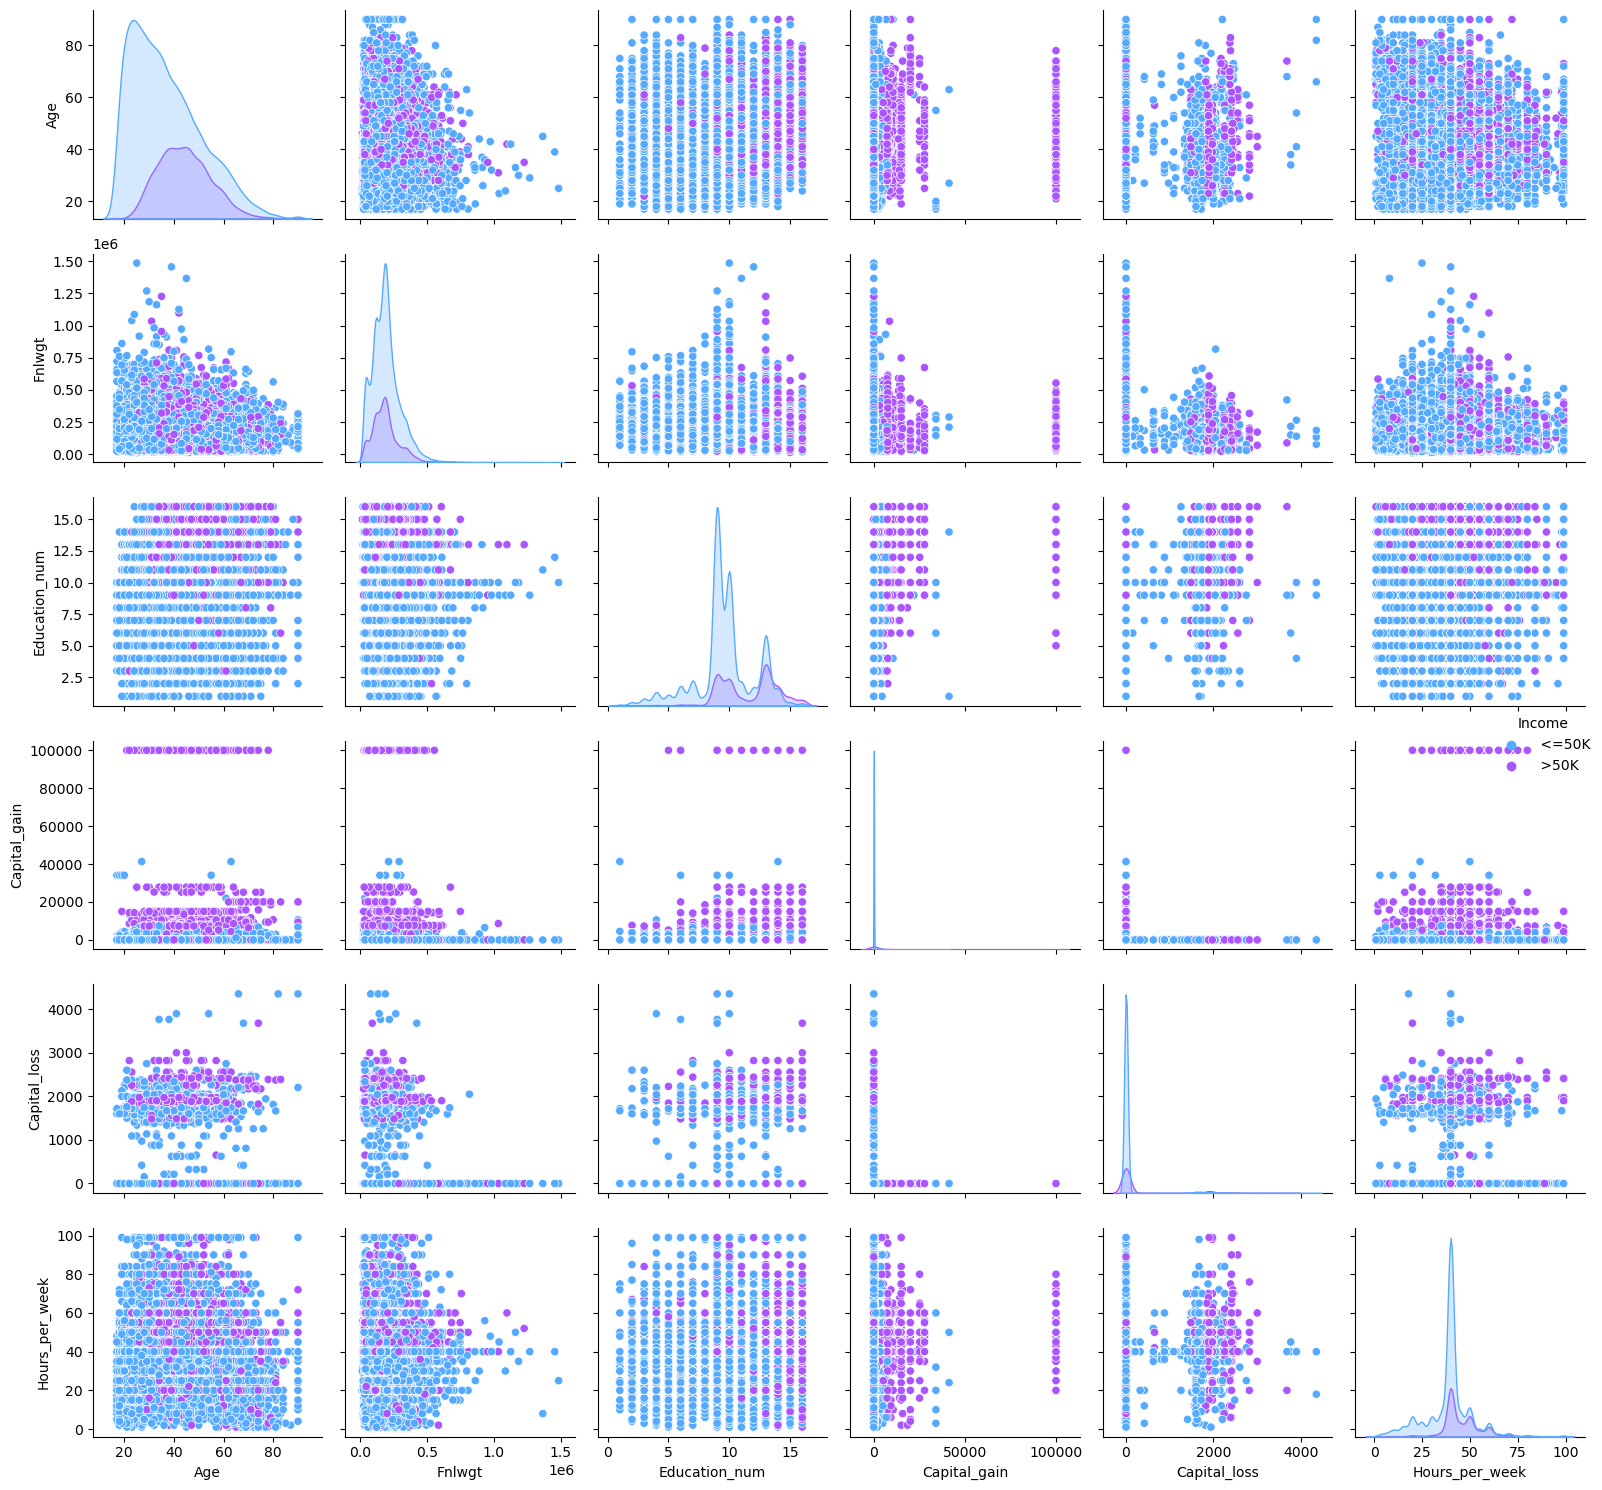

In [47]:
#checking the pairwise relation in the datasets

sns.pairplot(data=data,hue='Income', palette = 'cool')

In [48]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,41-50
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


# Encoding Categorial Data

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    data[i]=le.fit_transform(data[i])
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,41-50
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Feature Selection and Engineering

#### Outlier Detection and Removal

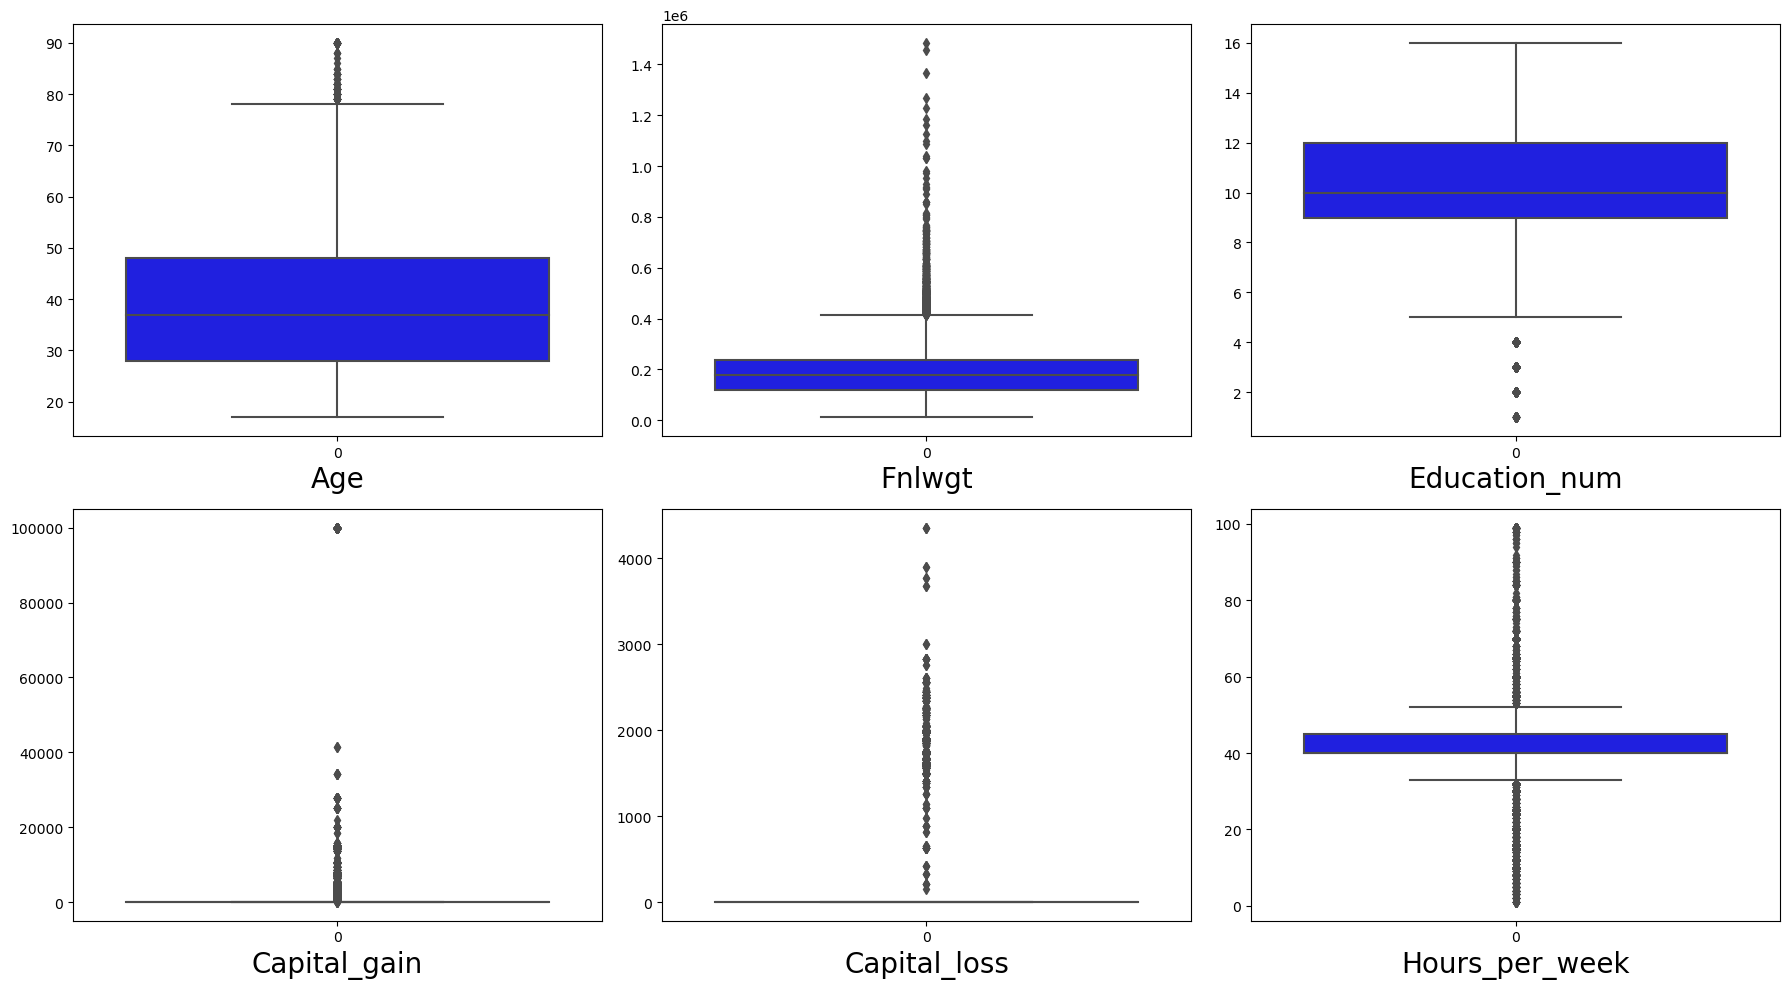

In [50]:
plt.figure(figsize=(18,10), facecolor='white')
plotnumber = 1
for column in Numerical:
    if plotnumber <=6:
        ax = plt.subplot(2,3, plotnumber)
        sns.boxplot(data[column],color='b')
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

#### From boxplot we can see outliers exits dataset

In [51]:
#Dropping unnecessary columns

data.drop(["Fnlwgt","Education","age_group"], axis = 1, inplace = True)

### Z-Score

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)


In [53]:
data = df.copy()

# Skewness of features

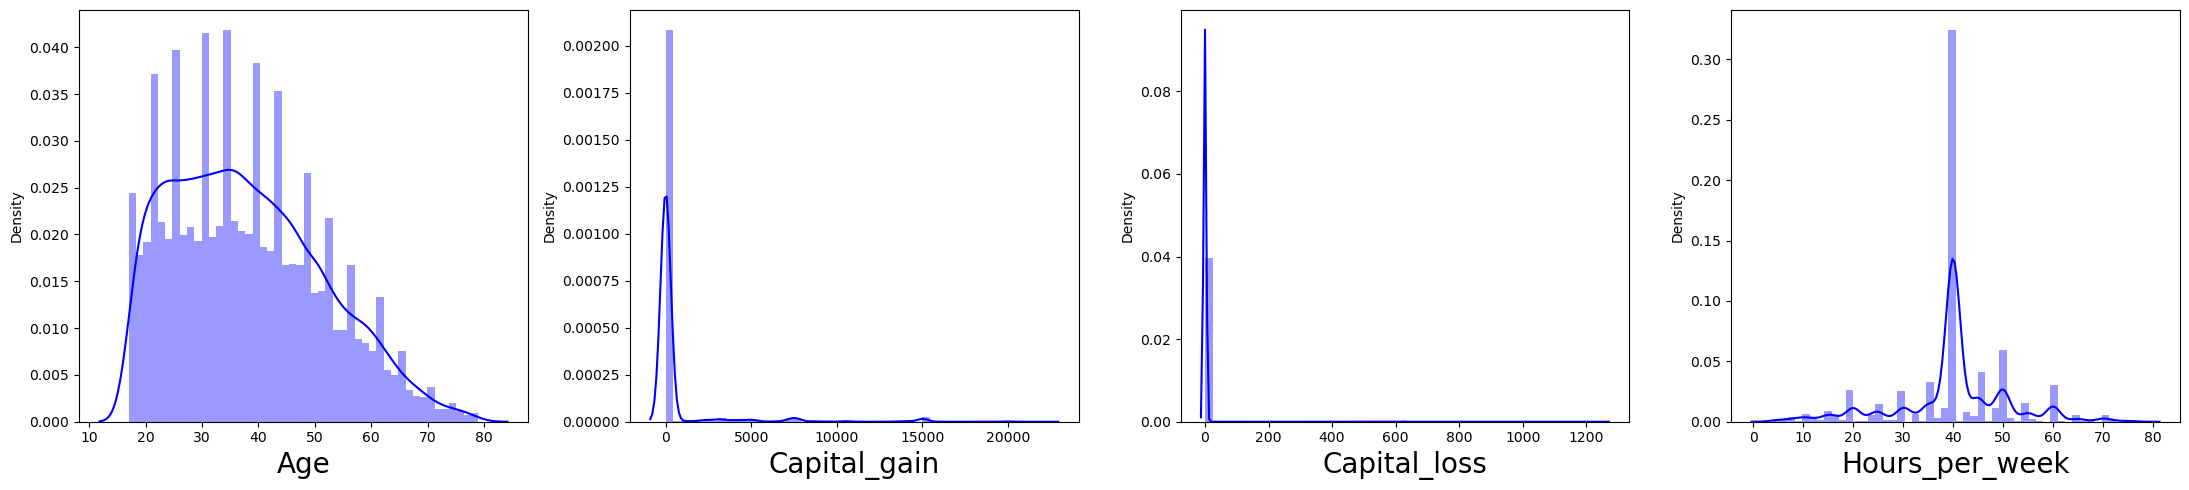

In [54]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in data[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(data[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [55]:
data.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

#### We will have option of scaling data to handle skewness in capital gain capital loss.

In [56]:
data.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


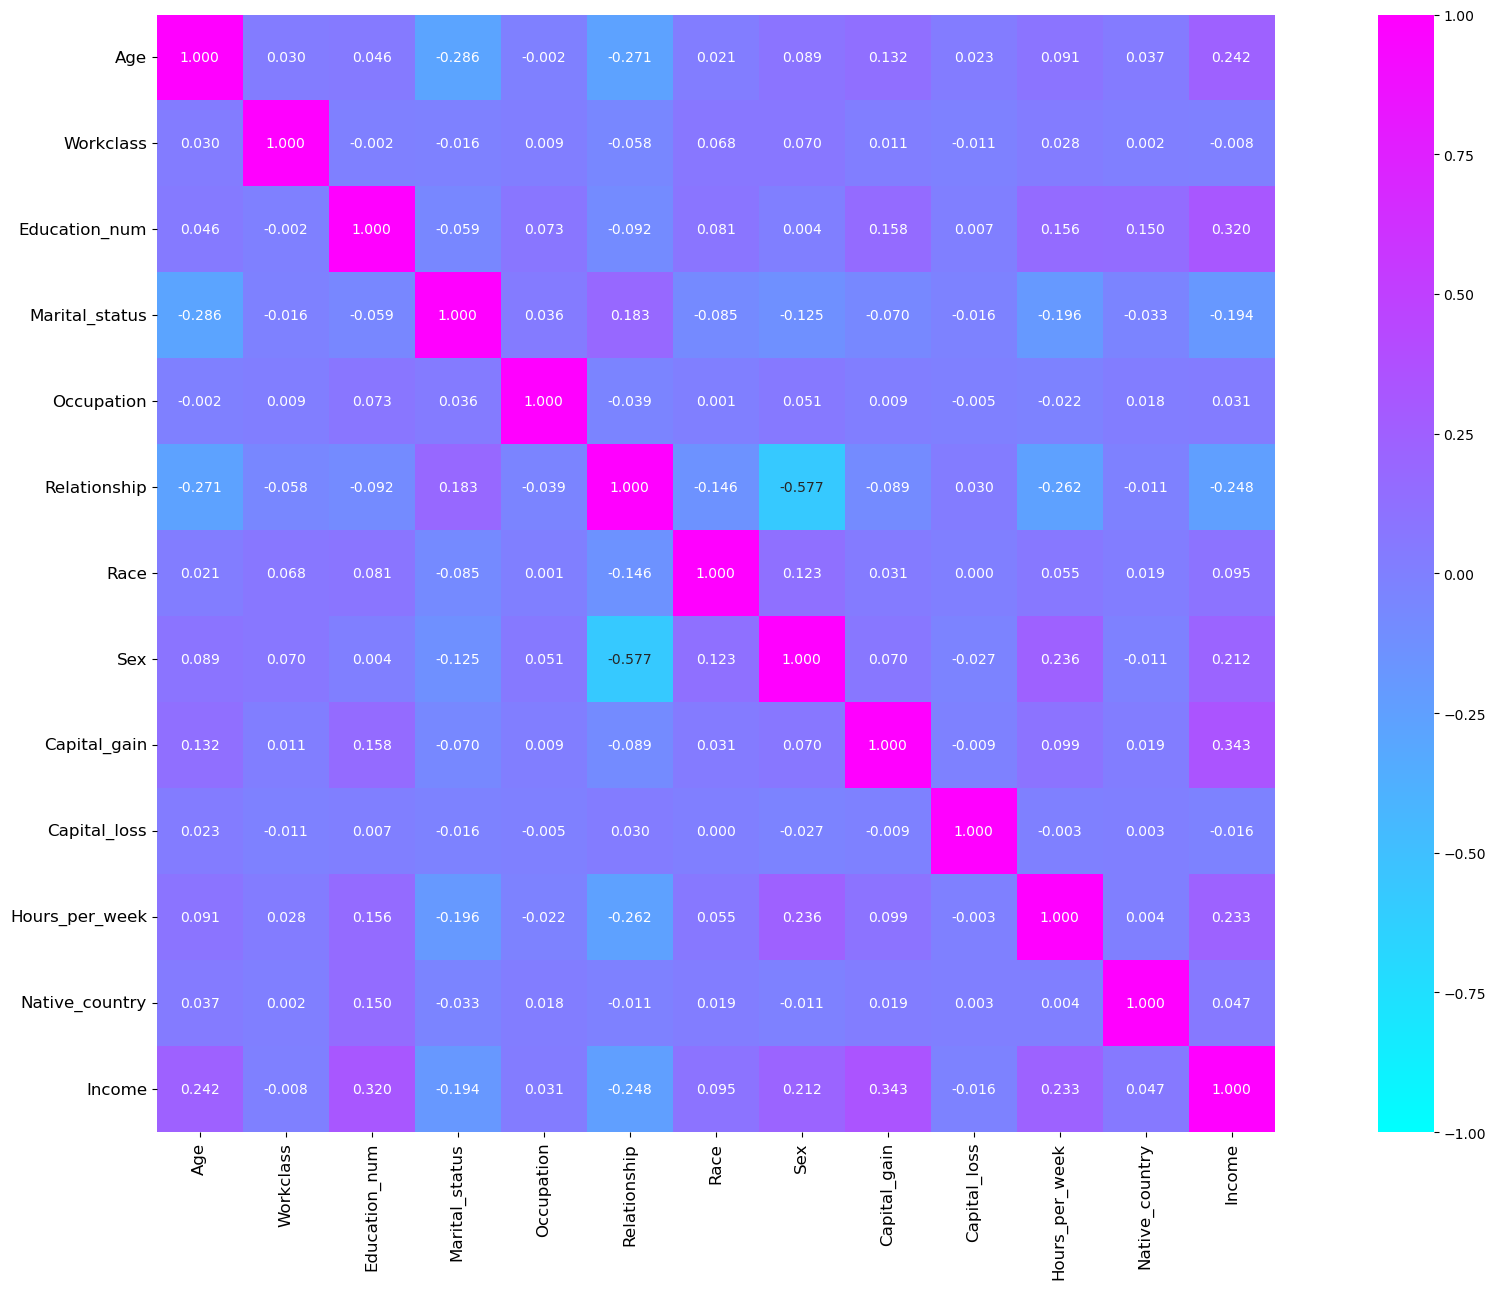

In [57]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

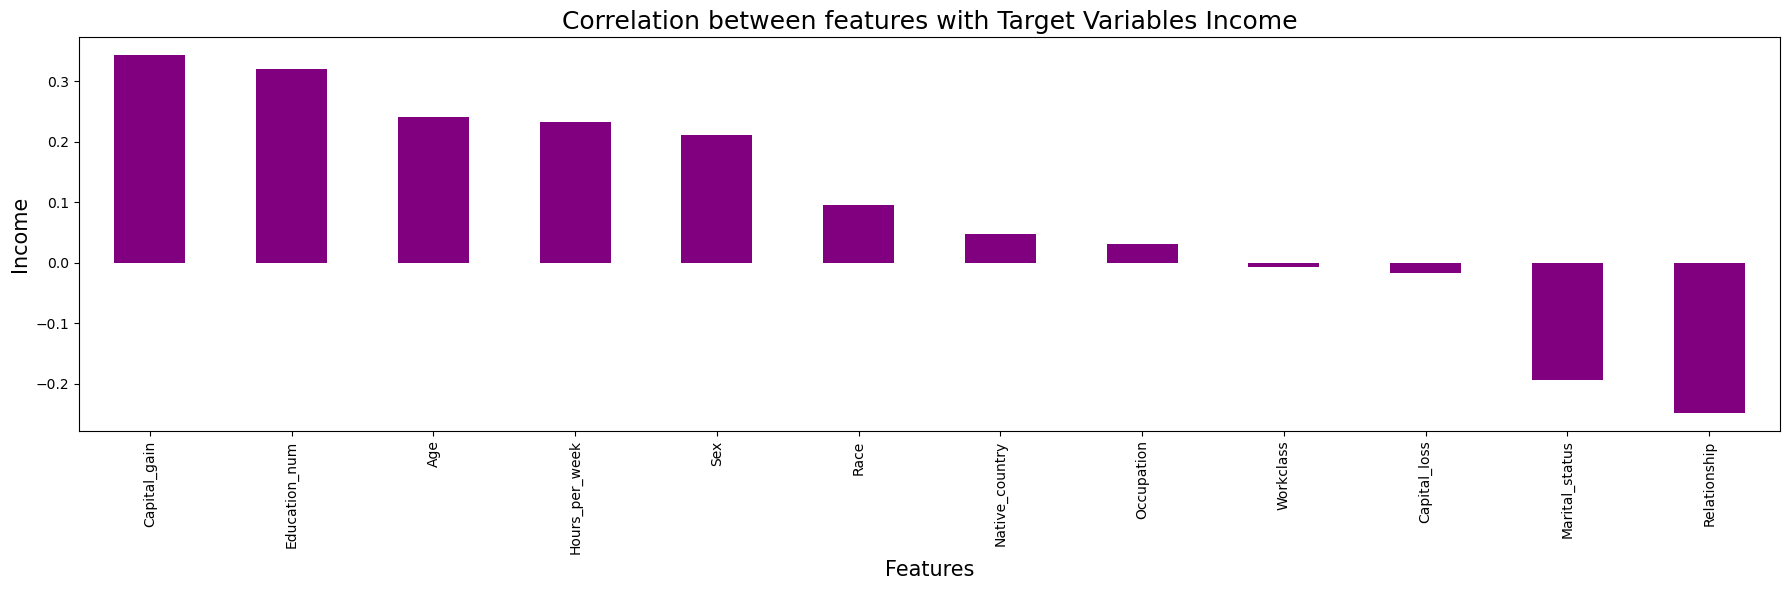

In [58]:
plt.figure(figsize=(18,6))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize = 15)
plt.title('Correlation between features with Target Variables Income', fontsize = 18)
plt.show()

From the above observation, we can say that

* Between input features maximum correlation of -0.557 exits between sex and relationship.
* Capital Gain is highly correlated with target variables.

# Checking Multicollinearity between features using variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


#### We will go by second way for further investigation. As for some independent features VIF is exceed permisible limit of 10.

# Balancing Imbalanced target Features

In [60]:
data.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

#### As target variable is imbalanced in nature we will need to balance target variable.

# Balacing using SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
# spliting data in target and dependent features

x = data.drop(['Income'],axis = 1)
y = data['Income']

In [63]:
# oversampling using SMOTE Techniques

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [64]:
y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

Now, we will resloved all class imbalaced problems and all the categorial have same data ensuring that the ML model does not get biased towords one category

# Standard Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# PCA

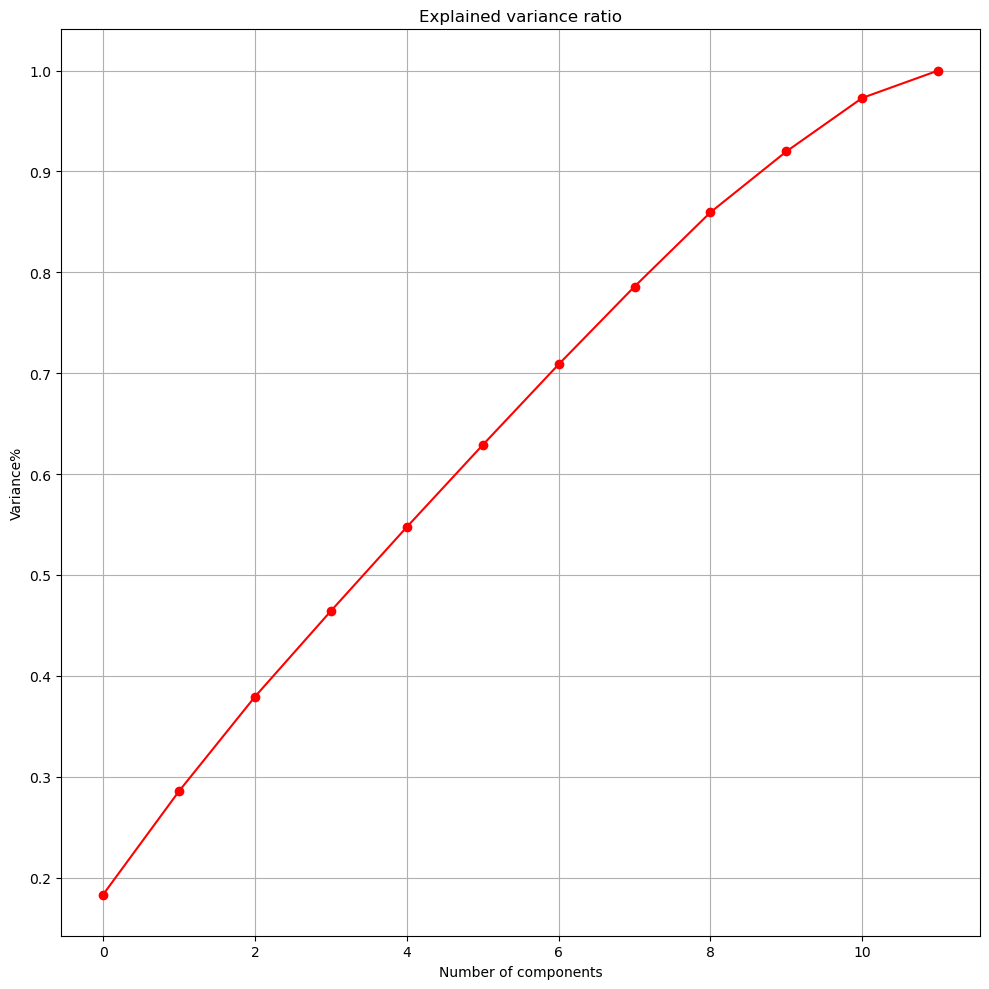

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

In [67]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x_scale)

In [68]:
pri_x = pd.DataFrame(x_new, columns=np.arange(9))

# Machine Learning Model Building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [70]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.3, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector : (30473,)
Test feature matrix size : (13061, 9)
Test target vector size : (13061,)


# Finding Best random rate

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(pri_x,y,test_size = 0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.7761274021897251 on Random_state 29


# Logistic Regression

In [72]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33,random_state=242)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.766061112271177
Confusion Matrix Of Logistic Regression :  [[5381 1774]
 [1587 5625]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.77      0.75      0.76      7155
           1       0.76      0.78      0.77      7212

    accuracy                           0.77     14367
   macro avg       0.77      0.77      0.77     14367
weighted avg       0.77      0.77      0.77     14367



# Cross validation

In [73]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.74928219 0.74549213 0.74824854 0.75399104 0.75465196]
Mean CVS Score :  0.7503331722054477
Std Deviation :  0.0034904989885403883


# Applying other classification algorithm

In [74]:
models =[
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8215354632143106


Confusion Matrix 
 [[5331 1824]
 [ 740 6472]]


Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      7155
           1       0.78      0.90      0.83      7212

    accuracy                           0.82     14367
   macro avg       0.83      0.82      0.82     14367
weighted avg       0.83      0.82      0.82     14367



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7176167606320039


Confusion Matrix 
 [[4139 3016]
 [1041 6171]]


Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.58      0.67      7155
           1       0.67      0.86      0.75      7212

    accuracy                           0.72     14367
   macro avg       0.74      0.72      0.71     14367
weighted avg       0.74      0.72      0.71     14367




# Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.59193752 0.58814747 0.59377512 0.59090387 0.59166092]
Mean Score : 0.5912849813006431
Std Deviation 0.0018306931623906868




Cross Validation Score GaussianNB() is
Score [0.7632939  0.77868382 0.78258872 0.77868382 0.78807719]
Mean Score : 0.7782654893117755
Std Deviation 0.008239638492606912




Cross Validation Score DecisionTreeClassifier() is
Score [0.81876651 0.84414839 0.86619961 0.86815206 0.87491385]
Mean Score : 0.8544360839290805
Std Deviation 0.02061069057272614




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.82359021 0.83932468 0.84782359 0.85103939 0.84906961]
Mean Score : 0.8421694974068489
Std Deviation 0.010114722542480971




Cross Validation Score RandomForestClassifier() is
Score [0.84495234 0.87102331 0.89606064 0.9005398  0.90052837]
Mean Score : 0.8826208918886238
Std Deviation 0.021798236580452303




Cross Validation Score AdaBoostClassifier() is
Score [0.81635466 0.83427128 0.84288504 0.849

# Hyper Parameter Tunning: GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]}]

In [80]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [81]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [82]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'entropy', max_depth = 20 , max_features = 'log2', n_estimators = 50)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8535532818264078


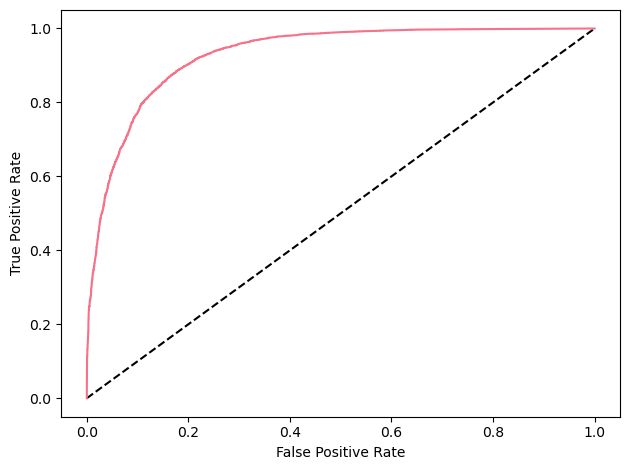

AUC SCORE 0.853448247795719


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test,final.predict(x_test))
print("AUC SCORE", auc_score)

# Predict the Final Model

In [84]:
#Prediction

prediction = final.predict(x_test)

In [85]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0


# Saving the Model

In [86]:
import joblib
joblib.dump(final,"Census Income Project")

['Census Income Project']